In [1]:
%matplotlib inline

In [2]:
from kid_readout.measurement.io import nc

In [3]:
filename = '/data/detectors/2016-06-14_124741_sweep_stream.nc'
ncf = nc.NCFile(filename)

In [4]:
ss = [ncf.read(name) for name in ncf.node_names()]

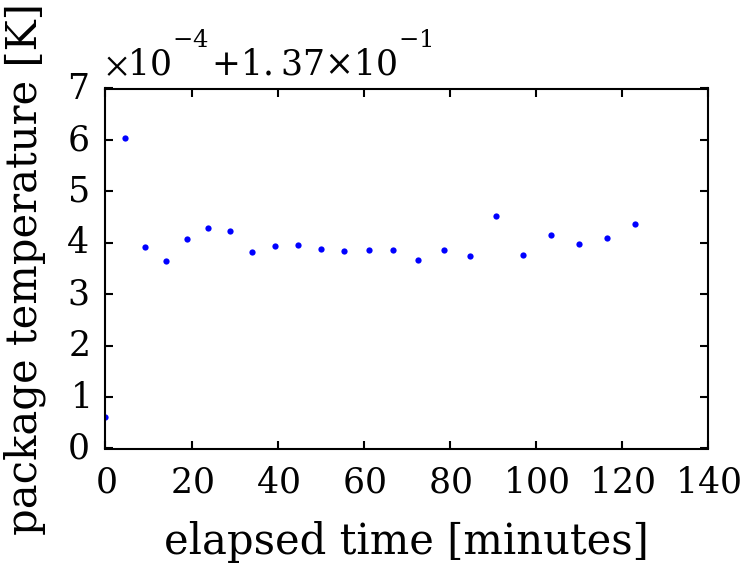

In [45]:
fig, ax = plt.subplots()
ax.plot([(s.stream.epoch - ss[0].stream.epoch) / 60 for s in ss],
        [s.state.temperature.package for s in ss],
        '.b')
ax.set_xlabel('elapsed time [minutes]')
ax.set_ylabel('package temperature [K]');

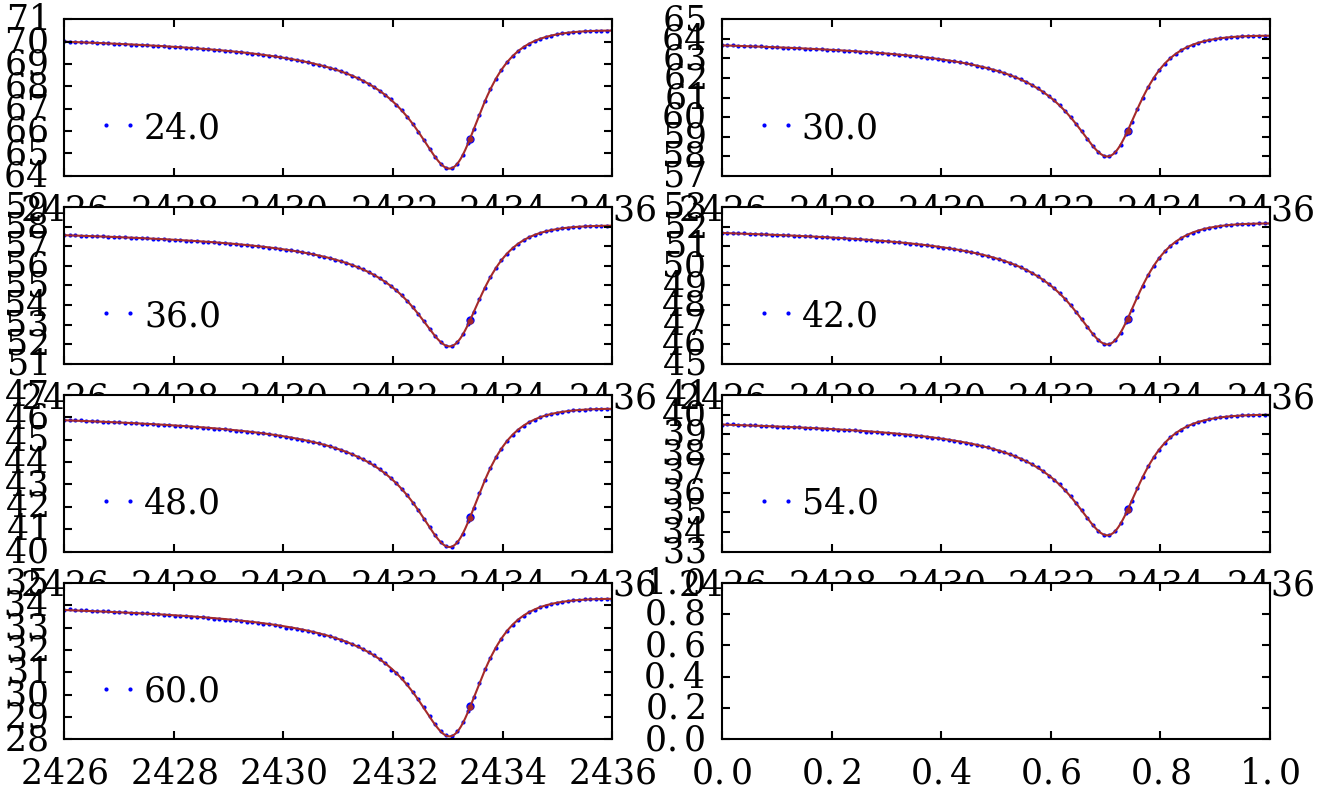

In [32]:
fig, axes = plt.subplots(4, 2, figsize=(6, 4))

for s, ax in zip(ss[0:7], axes.flatten()):
    f_scale = 1e-6
    f_min = s.sweep.frequency.min()
    f_max = s.sweep.frequency.max()

    f_model = np.linspace(f_min, f_max, 1000)
    s21_model = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_model)
    f_r = s.sweep.resonator.f_0
    s21_r = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_r)
    ax.plot(f_scale * s.sweep.frequency, 20 * np.log10(np.abs(s.sweep.s21_point)), '.b', markersize=2,
            label=str(s.stream.roach_state.dac_attenuation))
    ax.plot(f_scale * s.stream.frequency, 20 * np.log10(np.abs(s.stream.s21_point)), '.b', markersize=4)
    ax.plot(f_scale * f_model, 20 * np.log10(np.abs(s21_model)), '-', color='brown')
    ax.plot(f_scale * f_r, 20 * np.log10(np.abs(s21_r)), '.', color='brown', markersize=3)
    ax.legend(loc='best');

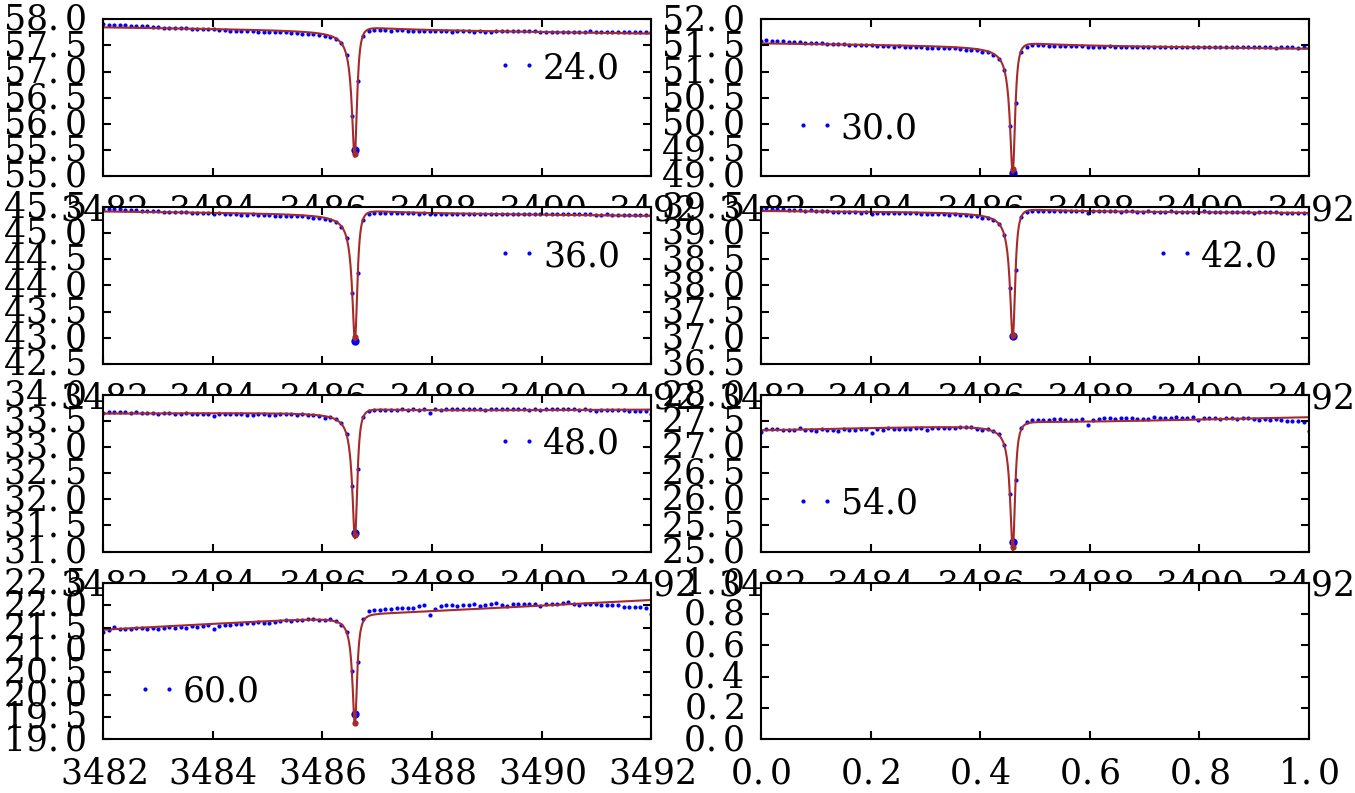

In [31]:
fig, axes = plt.subplots(4, 2, figsize=(6, 4))

for s, ax in zip(ss[7:14], axes.flatten()):
    f_scale = 1e-6
    f_min = s.sweep.frequency.min()
    f_max = s.sweep.frequency.max()

    f_model = np.linspace(f_min, f_max, 1000)
    s21_model = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_model)
    f_r = s.sweep.resonator.f_0
    s21_r = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_r)
    ax.plot(f_scale * s.sweep.frequency, 20 * np.log10(np.abs(s.sweep.s21_point)), '.b', markersize=2,
            label=str(s.stream.roach_state.dac_attenuation))
    ax.plot(f_scale * s.stream.frequency, 20 * np.log10(np.abs(s.stream.s21_point)), '.b', markersize=4)
    ax.plot(f_scale * f_model, 20 * np.log10(np.abs(s21_model)), '-', color='brown')
    ax.plot(f_scale * f_r, 20 * np.log10(np.abs(s21_r)), '.', color='brown', markersize=3)
    ax.legend(loc='best');

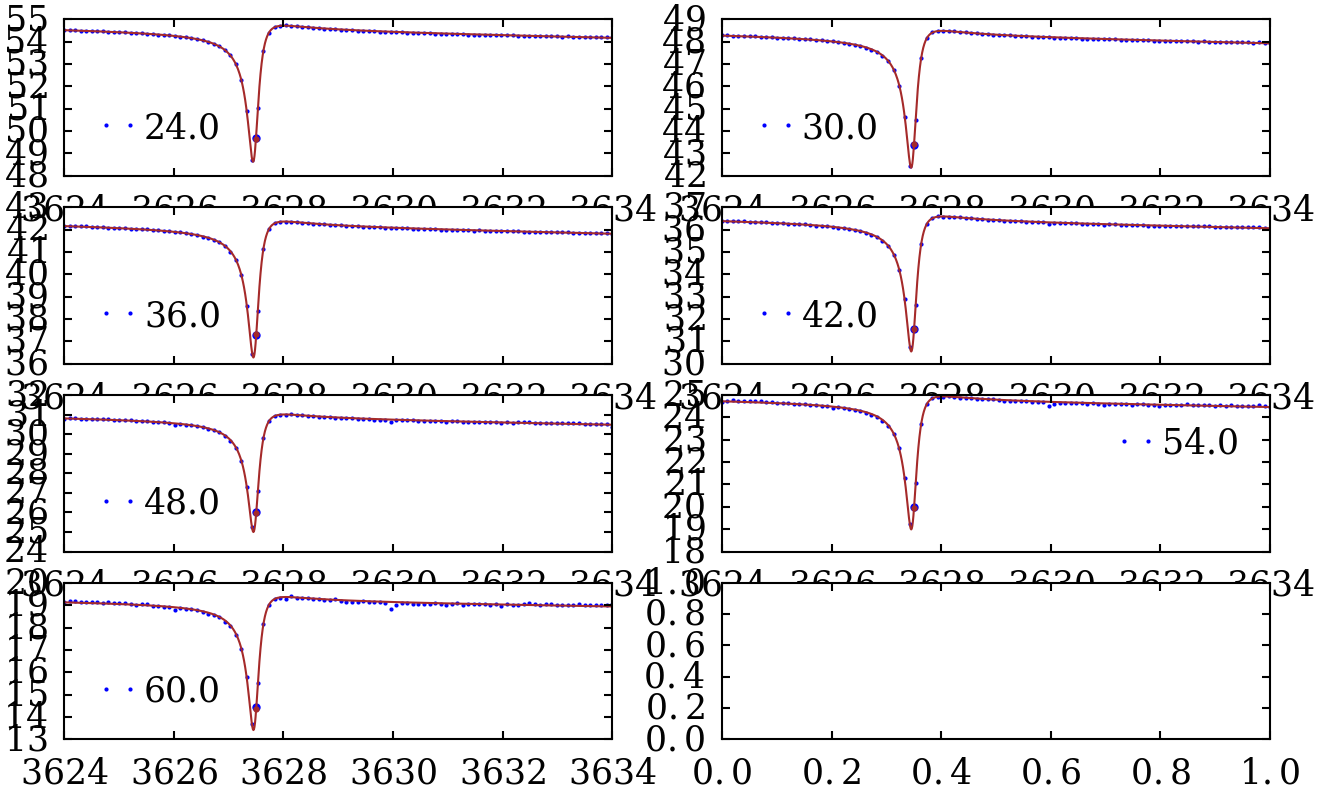

In [33]:
fig, axes = plt.subplots(4, 2, figsize=(6, 4))

for s, ax in zip(ss[14:21], axes.flatten()):
    f_scale = 1e-6
    f_min = s.sweep.frequency.min()
    f_max = s.sweep.frequency.max()

    f_model = np.linspace(f_min, f_max, 1000)
    s21_model = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_model)
    f_r = s.sweep.resonator.f_0
    s21_r = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_r)
    ax.plot(f_scale * s.sweep.frequency, 20 * np.log10(np.abs(s.sweep.s21_point)), '.b', markersize=2,
            label=str(s.stream.roach_state.dac_attenuation))
    ax.plot(f_scale * s.stream.frequency, 20 * np.log10(np.abs(s.stream.s21_point)), '.b', markersize=4)
    ax.plot(f_scale * f_model, 20 * np.log10(np.abs(s21_model)), '-', color='brown')
    ax.plot(f_scale * f_r, 20 * np.log10(np.abs(s21_r)), '.', color='brown', markersize=3)
    ax.legend(loc='best');

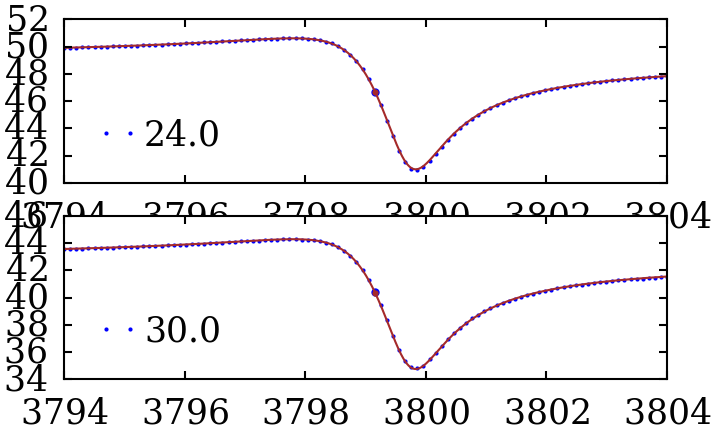

In [34]:
fig, axes = plt.subplots(2, 1)

for s, ax in zip(ss[21:23], axes.flatten()):
    f_scale = 1e-6
    f_min = s.sweep.frequency.min()
    f_max = s.sweep.frequency.max()

    f_model = np.linspace(f_min, f_max, 1000)
    s21_model = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_model)
    f_r = s.sweep.resonator.f_0
    s21_r = s.sweep.resonator.model.eval(params=s.sweep.resonator.current_params, f=f_r)
    ax.plot(f_scale * s.sweep.frequency, 20 * np.log10(np.abs(s.sweep.s21_point)), '.b', markersize=2,
            label=str(s.stream.roach_state.dac_attenuation))
    ax.plot(f_scale * s.stream.frequency, 20 * np.log10(np.abs(s.stream.s21_point)), '.b', markersize=4)
    ax.plot(f_scale * f_model, 20 * np.log10(np.abs(s21_model)), '-', color='brown')
    ax.plot(f_scale * f_r, 20 * np.log10(np.abs(s21_r)), '.', color='brown', markersize=3)
    ax.legend(loc='best');

In [7]:
df = pd.concat([s.to_dataframe() for s in ss])

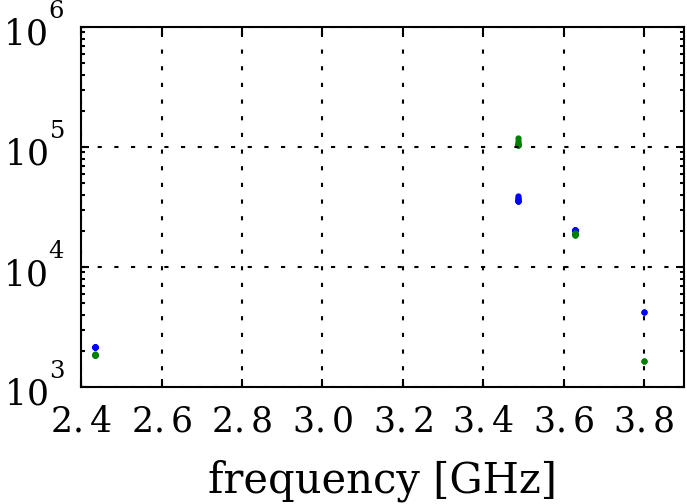

In [53]:
fig, ax = plt.subplots()

ax.plot(1e-9 * df.res_f_0, df.res_Q_i, '.')
ax.plot(1e-9 * df.res_f_0, df.res_Q_e_real, '.')

ax.set_xlim(2.4, 3.9)
ax.set_yscale('log')
ax.set_xlabel('frequency [GHz]')
ax.grid(True);

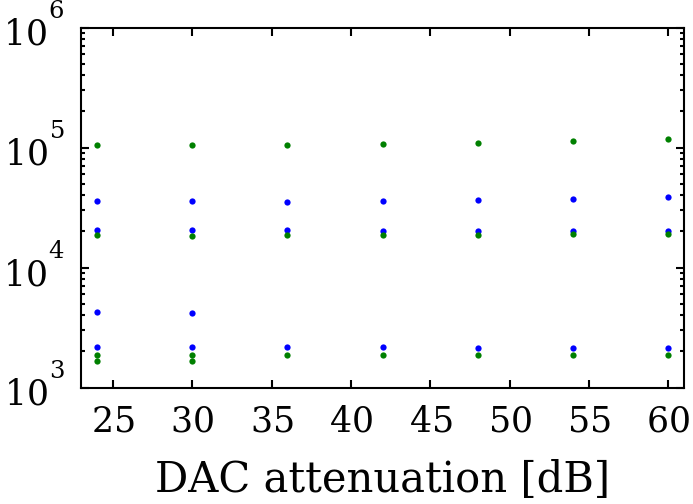

In [38]:
fig, ax = plt.subplots()

ax.plot(df.roach_dac_attenuation, df.res_Q_i, '.')
ax.plot(df.roach_dac_attenuation, df.res_Q_e_real, '.')

ax.set_xlim(23, 61)
ax.set_yscale('log')
ax.set_xlabel('DAC attenuation [dB]');

In [48]:
lo = np.unique(df.roach_lo_frequency)

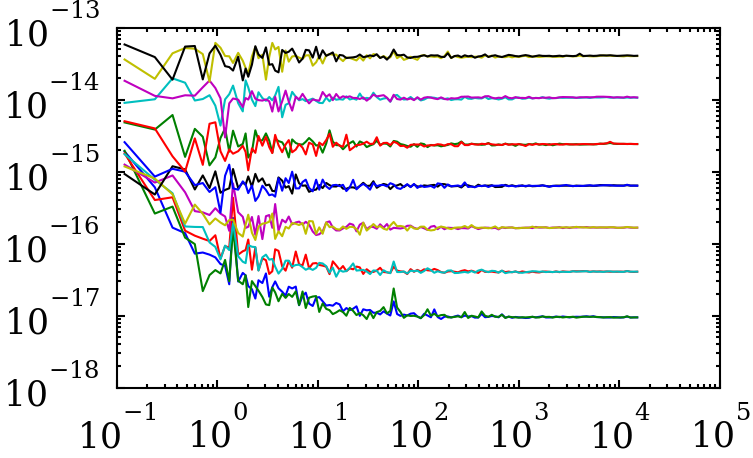

In [49]:
fig, ax = plt.subplots()

ax.set_yscale('log')
ax.set_xscale('log')

for n, row in df[df.roach_lo_frequency==lo[0]].iterrows():
    ax.plot(row.S_frequency, row.S_xx, label=str(row.roach_dac_attenuation))
    ax.plot(row.S_frequency, row.S_yy)

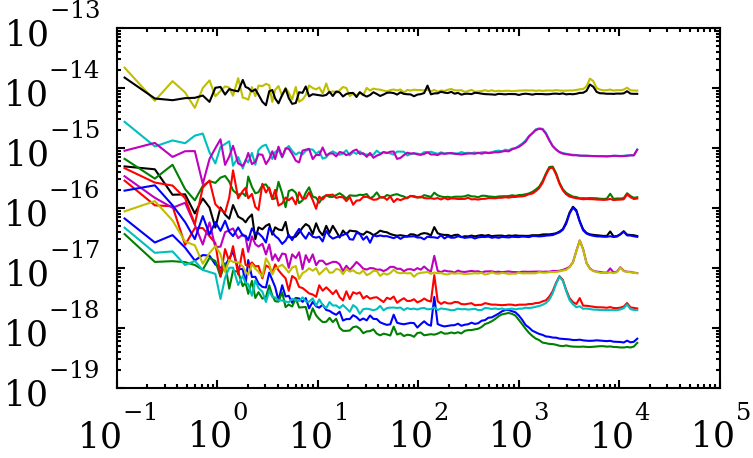

In [50]:
fig, ax = plt.subplots()

ax.set_yscale('log')
ax.set_xscale('log')

for n, row in df[df.roach_lo_frequency==lo[1]].iterrows():
    ax.plot(row.S_frequency, row.S_xx, label=str(row.roach_dac_attenuation))
    ax.plot(row.S_frequency, row.S_yy)

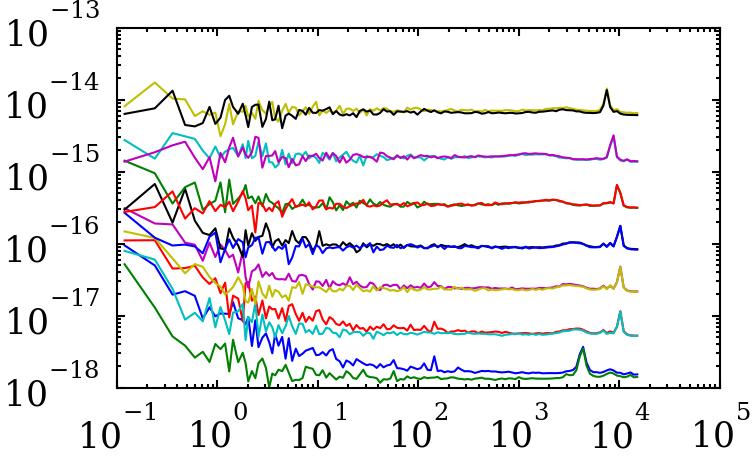

In [51]:
fig, ax = plt.subplots()

ax.set_yscale('log')
ax.set_xscale('log')

for n, row in df[df.roach_lo_frequency==lo[2]].iterrows():
    ax.plot(row.S_frequency, row.S_xx, label=str(row.roach_dac_attenuation))
    ax.plot(row.S_frequency, row.S_yy)

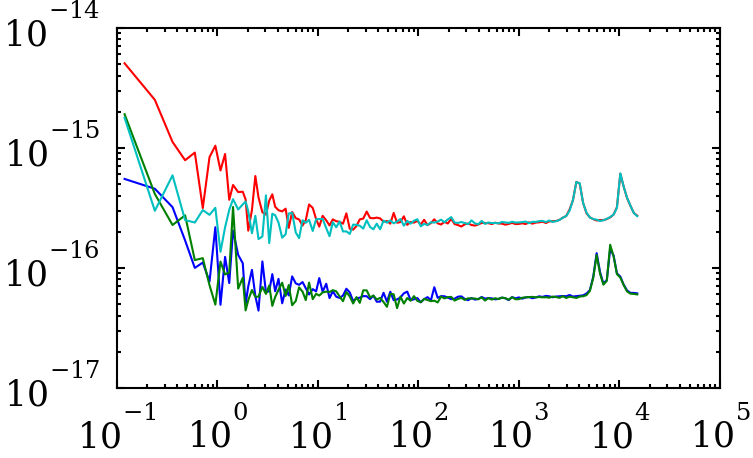

In [52]:
fig, ax = plt.subplots()

ax.set_yscale('log')
ax.set_xscale('log')

for n, row in df[df.roach_lo_frequency==lo[3]].iterrows():
    ax.plot(row.S_frequency, row.S_xx, label=str(row.roach_dac_attenuation))
    ax.plot(row.S_frequency, row.S_yy)

In [54]:
df.res_Q_i.max()

39047.999229704881